<a href="https://colab.research.google.com/github/scorepia/TraditionalMLvsMLP/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP with Income Tabular Datasets (Binary Classification)

In [59]:
print('gpu_name: ',tf.test.gpu_device_name())
print('Tensorflow Version :',tf.__version__)

gpu_name:  /device:GPU:0
Tensorflow Version : 2.8.2


In [60]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ba12df3b-1c47-473b-a0f8-71b46ad7296c)


## import libaries and modules

In [103]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Data Preparation 

In [62]:
#read csv in dataframe 
df = pd.read_csv('income_train.csv',index_col = 0)


In [63]:
#define 
# x is features 
#y is label with binary (0,1)
x=df.drop(['income_>50K'],axis=1)
y=df['income_>50K'].astype('int32')

In [64]:
x.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.744444,0.375,0.245857,0.666667,1.0000,0.000000,0.214286,0.2,1.0,1.0,1.0,0.0,0.606061,0.926829
1,0.188889,0.375,0.164118,0.133333,0.5000,0.666667,0.500000,0.6,1.0,1.0,0.0,0.0,0.151515,0.926829
2,0.344444,0.375,0.116882,0.600000,0.8125,0.333333,0.214286,0.0,1.0,1.0,0.0,0.0,0.404040,0.926829
3,0.644444,0.750,0.073939,0.333333,0.2500,0.333333,0.928571,0.0,1.0,1.0,0.0,0.0,0.404040,0.926829
4,0.277778,0.750,0.100140,1.000000,0.6250,0.666667,0.500000,0.2,0.5,1.0,0.0,0.0,0.404040,0.926829


In [65]:
#split dataset with 60 train / 40 test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 123,
                                                    shuffle = True)

In [66]:
x_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
23551,0.244444,0.375,0.194608,0.600000,0.8125,0.666667,0.500000,0.2,1.0,0.0,0.0,0.0,0.353535,0.024390
17995,0.288889,0.375,0.226744,0.266667,0.1875,0.666667,0.928571,0.2,1.0,1.0,0.0,0.0,0.404040,0.609756
13749,0.477778,0.375,0.087126,0.000000,0.3750,0.666667,0.428571,0.2,0.5,1.0,0.0,0.0,0.404040,0.926829
24542,0.433333,0.375,0.028210,0.066667,0.4375,0.333333,0.928571,0.0,1.0,1.0,0.0,0.0,0.404040,0.926829
18761,0.366667,0.375,0.140746,0.600000,0.8125,0.333333,0.642857,0.0,1.0,1.0,0.0,0.0,0.404040,0.926829


In [67]:
y_train.head()

23551    0
17995    0
13749    0
24542    0
18761    1
Name: income_>50K, dtype: int32

## Create the model  

In [68]:
#set seed 
tf.random.set_seed(123)

# Create the model
model_mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(14,activation="relu"),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(14, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

early_stopping = EarlyStopping(
    min_delta = 0.0002,
    patience  = 10,    
    restore_best_weights=True,
)

# Compile the model with the ideal learning rate
model_mlp.compile(loss="binary_crossentropy",
     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"])

# epochs
number_epochs = 50
# Fit the model
final_fit = model_mlp.fit(x_train,
                                y_train,
                                batch_size = 64,
                                epochs=number_epochs,
                                callbacks=[early_stopping],
                                validation_data=(x_test, y_test)) # see how the model performs on the test set during training

Epoch 1/50
413/413 [==============================] - 3s 5ms/step - loss: 0.5541 - accuracy: 0.7370 - val_loss: 0.4935 - val_accuracy: 0.7614
Epoch 2/50
413/413 [==============================] - 2s 5ms/step - loss: 0.4826 - accuracy: 0.7694 - val_loss: 0.4445 - val_accuracy: 0.7725
Epoch 3/50
413/413 [==============================] - 2s 4ms/step - loss: 0.4463 - accuracy: 0.7921 - val_loss: 0.4063 - val_accuracy: 0.8208
Epoch 4/50
413/413 [==============================] - 2s 4ms/step - loss: 0.4198 - accuracy: 0.7992 - val_loss: 0.3863 - val_accuracy: 0.8233
Epoch 5/50
413/413 [==============================] - 2s 5ms/step - loss: 0.4026 - accuracy: 0.8146 - val_loss: 0.3711 - val_accuracy: 0.8306
Epoch 6/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3905 - accuracy: 0.8220 - val_loss: 0.3610 - val_accuracy: 0.8318
Epoch 7/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3829 - accuracy: 0.8232 - val_loss: 0.3527 - val_accuracy: 0.8350
Epoch 

## Model result 

In [69]:
loss_acc = pd.DataFrame(final_fit.history)

loss_acc

,loss,accuracy,val_loss,val_accuracy
0,0.554095,0.736976,0.493479,0.761360
1,0.482589,0.769356,0.444524,0.772508
2,0.446312,0.792106,0.406344,0.820793
3,0.419845,0.799196,0.386329,0.823295
4,0.402558,0.814628,0.371129,0.830575
5,0.390518,0.821984,0.360969,0.831826
6,0.382947,0.823235,0.352718,0.834954
7,0.376792,0.826875,0.346767,0.838310
8,0.371928,0.828126,0.344670,0.838367
9,0.370432,0.829188,0.345761,0.839845


## Plot model learning curve 

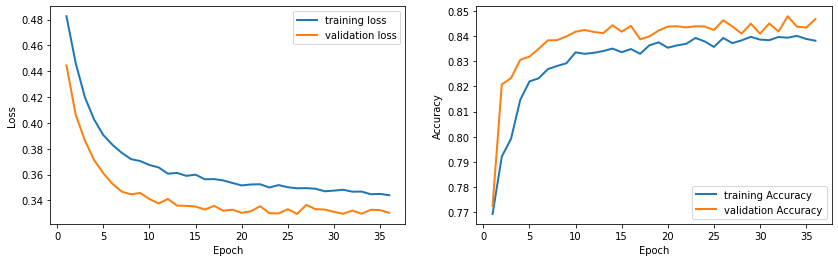

In [70]:
#plot graph between Epoch(X-Axis) and Loss(Y-Axis)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_acc.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(loss_acc.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

#plot graph between Epoch(X-Axis) and Accuracy(Y-Axis)
plt.subplot(1, 2, 2,)
plt.plot(loss_acc.loc[1:,"accuracy"], lw=2, label='training Accuracy')
plt.plot(loss_acc.loc[1:,"val_accuracy"], lw=2, label='validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

In [71]:
model_mlp.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 14)                210       
                                                                 
 dropout_8 (Dropout)         (None, 14)                0         
                                                                 
 dense_25 (Dense)            (None, 14)                210       
                                                                 
 dense_26 (Dense)            (None, 1)                 15        
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


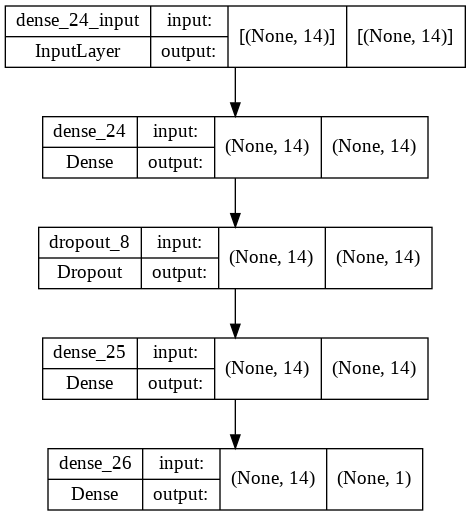

In [72]:
tf.keras.utils.plot_model(model_mlp, show_shapes=True)

## Model Evaluation

In [94]:
y_pred = model_mlp.predict(x_test)

y_pred

array([[0.9618957 ],
       [0.38510603],
       [0.7090178 ],
       ...,
       [0.35390562],
       [0.01357948],
       [0.01345126]], dtype=float32)

In [100]:
result = [float(item) for item in y_pred]

binary_result = []
for r in result:
    threshold = 0.5
    if r >= threshold:
        binary_result.append(1)
    else:
        binary_result.append(0)


In [79]:
loss,acc = model_mlp.evaluate(x_test, y_test)
print('Accuracy: ',acc)

550/550 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.8463
Accuracy:  0.8462719917297363


In [104]:
print(classification_report(y_test,binary_result))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     13387
           1       0.73      0.56      0.63      4196

    accuracy                           0.85     17583
   macro avg       0.80      0.75      0.77     17583
weighted avg       0.84      0.85      0.84     17583

